In [1]:
import nltk
from nltk.corpus.reader import CHILDESCorpusReader
import numpy as np
import pandas as pd
from nltk.probability import FreqDist
from pandas import DataFrame  
import matplotlib.pyplot as plt
corpus = nltk.data.find('/Users/Ershui13/nltk_data/corpora/childescorpus/')
pronounlist=['I', 'me', 'you', 'he' ,'him', 'she', 'her', 'we', 'us', 'they', 'them', 'it']
pronounlistmin=['I', 'me','he' ,'him', 'she', 'her', 'we', 'us', 'they', 'them']
pronounerrorlist = [('I', 'OBJ'),('I', 'POBJ'),('he', 'OBJ'),('he', 'POBJ'),('she', 'OBJ'),('she', 'POBJ'),('we', 'OBJ'),('we', 'POBJ'),('they', 'OBJ'),('they', 'POBJ'),('me', 'SUBJ'),('him', 'SUBJ'),('her','SUBJ')]

In [2]:
def errorsents(child,fileid):
    tagsenti=child.tagged_sents(fileid, relation = True, speaker = ['CHI'])
    num = len(child.sents(fileid))
    taglist=[] 
    taglist.append(tagsenti[:num])
    for tag in taglist:
        for w in pronounlistmin:
            if w in tag:
                taglist.append(tag)
    return taglist
def errorlist(child,fileid):
    countlist = []
    nnlist = []
    taglist = errorsents(child,fileid)
    for sent in taglist:
        for ss in sent:
            for nn in ss:
                for w in pronounlistmin:
                    if w in nn:
                        nnlist.append(nn)
    for n in nnlist:
        nlist=list(n)
        del nlist[1]
        a = tuple(i.split("|")[-1] for i in nlist)
        countlist.append(a)
    return countlist
def errornum(child,fileid):
    countlist = errorlist(child,fileid)
    errorcountlist=[countlist.count(er) for er in pronounerrorlist]
    return errorcountlist
def errornumlist(child,fileid):
    countlist = errorlist(child,fileid)
    errorcountlist=[countlist.count(er) for er in pronounerrorlist]
    return errorcountlist

In [3]:
def totalpronoun(child,fileid):
    freqdist = FreqDist(child.words(fileid,speaker= ['CHI']))  
    totalpronoun = [freqdist[i] for i in pronounlist ]
    return totalpronoun
def totalpronounmin(child,fileid):
    freqdist = FreqDist(child.words(fileid,speaker= ['CHI']))  
    totalpronounmin = [freqdist[t] for t in pronounlistmin]
    return totalpronounmin

In [4]:
def ageplot(child_table):
    plt.plot(child_table['age'], child_table['%error'], '.')
    return plt.show()
def mluplot(child_table):
    plt.plot(child_table['mlu'], child_table['%error'], '.')
    return plt.show()

# Bohannon

In [9]:
Bax = CHILDESCorpusReader(corpus, 'Bohannon/Bax.*.xml')
Baxalldata=[]
for fileid in Bax.fileids():
    Baxdata=[fileid,Bax.age(fileid, month=True)[0],Bax.MLU(fileid)[0],len(Bax.words(fileid, speaker=['CHI'])),sum(totalpronoun(Bax,fileid)),sum(totalpronounmin(Bax,fileid)),sum(errornum(Bax,fileid))]
    Baxalldata.append(Baxdata)
from pandas import DataFrame  
Bax_table = DataFrame(Baxalldata)
Bax_table.columns = ['fileid','age', 'mlu', '#words','#pronouns','#cased_pronoun','#errors']

In [10]:
Bax_table['%error'] = (Bax_table['#errors']/Bax_table['#cased_pronoun'])
Bax_table['group'] = Bax_table['age']
Bax_table.to_csv('Bax.csv', sep='\t')
Bax_table.sort_values('mlu')

,fileid,age,mlu,#words,#pronouns,#cased_pronoun,#errors,%error,group
6,Bohannon/Bax/mari10.xml,36,2.029126,258,11,8,0,0.000000,36
1,Bohannon/Bax/judy6.xml,36,2.084967,506,24,16,0,0.000000,36
0,Bohannon/Bax/gina11.xml,36,2.166667,147,12,10,0,0.000000,36
7,Bohannon/Bax/mich7.xml,36,2.308271,351,34,25,1,0.040000,36
2,Bohannon/Bax/karen3.xml,36,2.342342,298,22,13,1,0.076923,36
5,Bohannon/Bax/lindy8.xml,36,2.630137,440,77,30,1,0.033333,36
3,Bohannon/Bax/kelley2.xml,36,2.707071,324,23,14,0,0.000000,36
4,Bohannon/Bax/leah1.xml,36,2.722892,243,46,25,0,0.000000,36
8,Bohannon/Bax/russ9.xml,36,2.822581,416,46,37,0,0.000000,36
9,Bohannon/Bax/thad5.xml,36,2.857143,286,18,11,0,0.000000,36


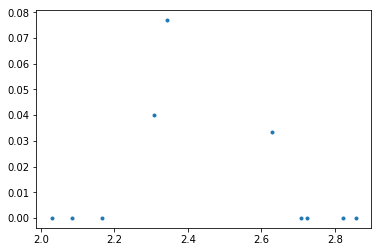

In [11]:
mluplot(Bax_table)

In [14]:
Nat = CHILDESCorpusReader(corpus, 'Bohannon/Nat.*.xml')
Natalldata=[]
for fileid in Nat.fileids():
    Natdata=[fileid,Nat.age(fileid, month=True)[0],Nat.MLU(fileid)[0],len(Nat.words(fileid, speaker=['CHI'])),sum(totalpronoun(Nat,fileid)),sum(totalpronounmin(Nat,fileid)),sum(errornum(Nat,fileid))]
    Natalldata.append(Natdata)
Nat_table = DataFrame(Natalldata)
Nat_table.columns = ['fileid','age', 'mlu','#words','#pronouns','#cased_pronoun','#errors']

In [15]:
Nat_table['%error'] = (Nat_table['#errors']/Nat_table['#cased_pronoun'])
Nat_table['group'] = Nat_table['age']
Nat_table.to_csv('Nat.csv', sep='\t')
Nat_table.sort_values('mlu')

,fileid,age,mlu,#words,#pronouns,#cased_pronoun,#errors,%error,group
10,Bohannon/Nat/kim.xml,36,3.455556,321,20,9,0,0.000000,36
9,Bohannon/Nat/john.xml,36,3.555556,238,27,22,0,0.000000,36
14,Bohannon/Nat/ruth.xml,36,3.764706,361,22,17,0,0.000000,36
2,Bohannon/Nat/claire.xml,36,4.000000,227,21,18,0,0.000000,36
15,Bohannon/Nat/stephani.xml,36,4.164557,337,37,26,0,0.000000,36
7,Bohannon/Nat/harvey.xml,36,4.202381,1718,154,114,2,0.017544,36
0,Bohannon/Nat/angela.xml,36,4.262500,351,61,50,0,0.000000,36
3,Bohannon/Nat/dan.xml,36,4.378378,160,13,5,0,0.000000,36
12,Bohannon/Nat/lindsey.xml,36,4.494118,369,59,50,0,0.000000,36
13,Bohannon/Nat/noel.xml,36,4.547368,446,38,28,0,0.000000,36


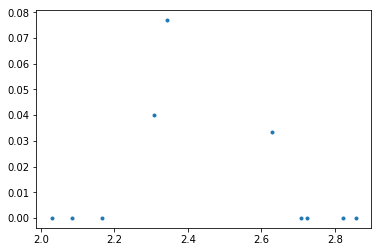

In [16]:
mluplot(Bax_table)

# NewEngland

In [18]:
NewEngland = CHILDESCorpusReader(corpus, 'NewEngland/32.*.xml')
NewEnglandalldata=[]
for fileid in NewEngland.fileids():
    NewEnglanddata=[fileid,NewEngland.age(fileid, month=True)[0],NewEngland.MLU(fileid)[0],len(NewEngland.words(fileid, speaker=['CHI'])),sum(totalpronoun(NewEngland,fileid)),sum(totalpronounmin(NewEngland,fileid)),sum(errornum(NewEngland,fileid))]
    NewEnglandalldata.append(NewEnglanddata)
NewEngland_table = DataFrame(NewEnglandalldata)
NewEngland_table.columns = ['fileid','age', 'mlu','#words','#pronouns','#cased_pronoun','#errors']

In [19]:
NewEngland_table['%error'] = (NewEngland_table['#errors']/NewEngland_table['#cased_pronoun'])
NewEngland_table['group'] = NewEngland_table['age']
NewEngland_table.to_csv('NewEngland.csv', sep='\t')
NewEngland_table.sort_values('mlu')

,fileid,age,mlu,#words,#pronouns,#cased_pronoun,#errors,%error,group
19,NewEngland/32/45.xml,31,1.680556,203,8,5,0,0.000000,31
34,NewEngland/32/96.xml,27,1.680556,155,8,6,0,0.000000,27
35,NewEngland/32/98.xml,28,1.815476,378,23,17,1,0.058824,28
30,NewEngland/32/84.xml,32,2.051020,263,21,13,0,0.000000,32
29,NewEngland/32/75.xml,28,2.070175,131,4,1,0,0.000000,28
36,NewEngland/32/99.xml,27,2.200000,228,22,16,0,0.000000,27
1,NewEngland/32/02.xml,32,2.293233,330,26,18,0,0.000000,32
32,NewEngland/32/90.xml,28,2.458333,212,18,17,0,0.000000,28
3,NewEngland/32/04.xml,30,2.472973,215,13,10,0,0.000000,30
31,NewEngland/32/87.xml,32,2.558140,257,12,8,0,0.000000,32


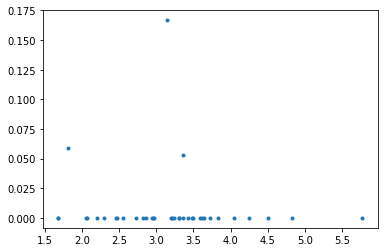

In [73]:
mluplot(NewEngland_table)

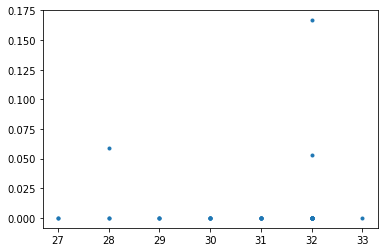

In [74]:
ageplot(NewEngland_table)

# Valian

In [34]:
Valian = CHILDESCorpusReader(corpus, 'Valian/.*.xml')
Valianalldata=[]
for fileid in Valian.fileids():
    Valiandata=[fileid,Valian.age(fileid, month=True)[0],Valian.MLU(fileid)[0],len(Valian.words(fileid, speaker=['CHI'])),sum(totalpronoun(Valian,fileid)),sum(totalpronounmin(Valian,fileid)),sum(errornum(Valian,fileid)),fileid[:9]]
    Valianalldata.append(Valiandata)
Valian_table = DataFrame(Valianalldata)
Valian_table.columns = ['fileid','age', 'mlu','#words','#pronouns','#cased_pronoun','#errors','group']

In [35]:
Valian_table['%error'] = (Valian_table['#errors']/Valian_table['#cased_pronoun'])
Valian_table.to_csv('Valian.csv', sep='\t')
Valian_table.sort_values('mlu')

,fileid,age,mlu,#words,#pronouns,#cased_pronoun,#errors,group,%error
4,Valian/03a.xml,26,1.736626,542,19,10,0,Valian/03,0.000000
1,Valian/01b.xml,25,1.996610,720,8,2,0,Valian/01,0.000000
0,Valian/01a.xml,25,2.023346,571,14,2,0,Valian/01,0.000000
5,Valian/03b.xml,26,2.130872,750,44,34,0,Valian/03,0.000000
7,Valian/04b.xml,22,2.331984,678,14,5,0,Valian/04,0.000000
10,Valian/06a.xml,27,2.424000,336,45,28,1,Valian/06,0.035714
18,Valian/10a.xml,29,2.462963,301,22,15,0,Valian/10,0.000000
9,Valian/05a.xml,26,2.481268,992,75,46,0,Valian/05,0.000000
3,Valian/02b.xml,22,2.523438,1132,59,39,0,Valian/02,0.000000
6,Valian/04a.xml,22,2.562842,541,35,25,0,Valian/04,0.000000


In [36]:
Valian_table1 = Valian_table.groupby(Valian_table['group']).sum()
Valian_table1['age'] = Valian_table['age'].groupby(Valian_table['group']).mean()
Valian_table1['mlu'] = Valian_table['mlu'].groupby(Valian_table['group']).mean()
Valian_table1['%error'] = (Valian_table1['#errors']/Valian_table1['#cased_pronoun'])
Valian_table1.to_csv('Valian.csv', mode='a', header=True)
Valian_table1


,age,mlu,#words,#pronouns,#cased_pronoun,#errors,%error
group,,,,,,,
Valian/01,25.000000,2.009978,1291,22,4,0,0.000000
Valian/02,22.000000,2.625121,1764,103,64,0,0.000000
Valian/03,26.000000,1.933749,1292,63,44,0,0.000000
Valian/04,22.000000,2.698475,2445,183,129,1,0.007752
Valian/05,26.000000,2.481268,992,75,46,0,0.000000
Valian/06,27.000000,2.547443,1042,126,78,1,0.012821
Valian/07,28.000000,2.871728,1268,121,111,4,0.036036
Valian/08,31.000000,3.383796,2372,250,124,5,0.040323
Valian/09,32.000000,3.532711,1649,204,112,1,0.008929


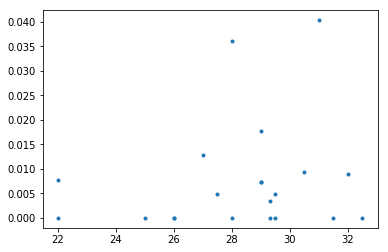

In [38]:
ageplot(Valian_table1)

# HSSLD

In [58]:
HSLLD = CHILDESCorpusReader(corpus, 'HSLLD/HV1/.*.xml')
HSLLDalldata=[]
for fileid in HSLLD.fileids():
    name = fileid[:6]+fileid[13:16]
    HSLLDdata=[fileid,name,HSLLD.age(fileid, month=True)[0],HSLLD.MLU(fileid)[0],len(HSLLD.words(fileid, speaker=['CHI'])),sum(totalpronoun(HSLLD,fileid)),sum(totalpronounmin(HSLLD,fileid)),sum(errornum(HSLLD,fileid))]
    HSLLDalldata.append(HSLLDdata)
HSLLD_table = DataFrame(HSLLDalldata)
HSLLD_table.columns = ['fileid','group','age','mlu','#words','#pronouns','#cased_pronoun','#errors']

In [64]:
HSLLD_table = DataFrame(HSLLDalldata)
HSLLD_table.columns = ['fileid','group','age','mlu','#words','#pronouns','#cased_pronoun','#errors']

In [65]:
HSLLD_table['%error'] = (HSLLD_table['#errors']/HSLLD_table['#cased_pronoun'])
HSLLD_table.to_csv('HSLLD.csv', sep='\t')
HSLLD_table.sort_values('mlu')

,fileid,group,age,mlu,#words,#pronouns,#cased_pronoun,#errors,%error
104,HSLLD/HV1/ER/coner1.xml,HSLLD/con,51,0.000000,2,0,0,0,NaN
154,HSLLD/HV1/ER/soper1.xml,HSLLD/sop,48,1.000000,7,1,0,0,NaN
51,HSLLD/HV1/BR/marbr1.xml,HSLLD/mar,50,1.000000,5,0,0,0,NaN
13,HSLLD/HV1/BR/brnbr1.xml,HSLLD/brn,50,1.000000,5,0,0,0,NaN
39,HSLLD/HV1/BR/jasbr1.xml,HSLLD/jas,47,1.000000,1,0,0,0,NaN
275,HSLLD/HV1/TP/martp1.xml,HSLLD/mar,50,1.300000,19,0,0,0,NaN
251,HSLLD/HV1/TP/deatp1.xml,HSLLD/dea,47,1.583333,25,1,1,0,0.000000
108,HSLLD/HV1/ER/dever1.xml,HSLLD/dev,44,1.666667,16,0,0,0,NaN
138,HSLLD/HV1/ER/morer1.xml,HSLLD/mor,59,1.800000,13,1,1,0,0.000000
73,HSLLD/HV1/BR/shobr1.xml,HSLLD/sho,43,1.863636,39,2,2,0,0.000000


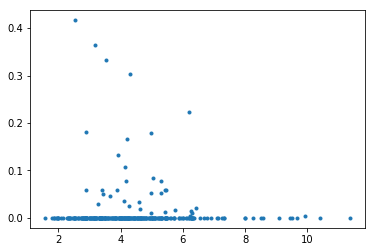

In [66]:
mluplot(HSLLD_table)

In [67]:
HSLLD_table1 = HSLLD_table.groupby(HSLLD_table['group']).sum()
HSLLD_table1['age'] = HSLLD_table['age'].groupby(HSLLD_table['group']).mean()
HSLLD_table1['mlu'] = HSLLD_table['mlu'].groupby(HSLLD_table['group']).mean()
HSLLD_table1['%error']=HSLLD_table1['#errors']/HSLLD_table1['#cased_pronoun']
HSLLD_table1.to_csv('HSLLD.csv', mode='a', header=True)
HSLLD_table1

,age,mlu,#words,#pronouns,#cased_pronoun,#errors,%error
group,,,,,,,
HSLLD/ace,43.000000,2.626984,128,11,8,0,0.000000
HSLLD/adm,49.000000,5.018357,1112,128,106,0,0.000000
HSLLD/aim,46.750000,4.764386,2439,276,139,0,0.000000
HSLLD/ali,48.750000,4.510508,1355,145,105,2,0.019048
HSLLD/all,43.000000,4.372396,1084,82,50,0,0.000000
HSLLD/ana,50.000000,4.090910,1545,182,125,7,0.056000
HSLLD/ann,49.500000,4.601494,1062,142,96,1,0.010417
HSLLD/apr,44.000000,2.949206,187,24,13,0,0.000000
HSLLD/arl,57.000000,2.949167,411,47,34,0,0.000000


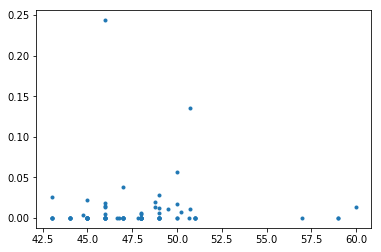

In [68]:
ageplot(HSLLD_table1)

In [80]:
totaldf = Bax_table.append(Nat_table)
totaldf = totaldf.append(NewEngland_table)
totaldf = totaldf.append(Valian_table)
totaldf = totaldf.append(HSLLD_table)


In [92]:
totaldf1 = Bax_table.append(Nat_table)
totaldf1 = totaldf1.append(NewEngland_table)
totaldf1 = totaldf1.append(Valian_table1)
totaldf1 = totaldf1.append(HSLLD_table1)
totaldf1

,#cased_pronoun,#errors,#pronouns,#words,%error,age,fileid,group,mlu
0,10,0,12,147,0.000000,36.000000,Bohannon/Bax/gina11.xml,36.0,2.166667
1,16,0,24,506,0.000000,36.000000,Bohannon/Bax/judy6.xml,36.0,2.084967
2,13,1,22,298,0.076923,36.000000,Bohannon/Bax/karen3.xml,36.0,2.342342
3,14,0,23,324,0.000000,36.000000,Bohannon/Bax/kelley2.xml,36.0,2.707071
4,25,0,46,243,0.000000,36.000000,Bohannon/Bax/leah1.xml,36.0,2.722892
5,30,1,77,440,0.033333,36.000000,Bohannon/Bax/lindy8.xml,36.0,2.630137
6,8,0,11,258,0.000000,36.000000,Bohannon/Bax/mari10.xml,36.0,2.029126
7,25,1,34,351,0.040000,36.000000,Bohannon/Bax/mich7.xml,36.0,2.308271
8,37,0,46,416,0.000000,36.000000,Bohannon/Bax/russ9.xml,36.0,2.822581
9,11,0,18,286,0.000000,36.000000,Bohannon/Bax/thad5.xml,36.0,2.857143


In [81]:
mlu_table = totaldf[['fileid','age','mlu','#words','#pronouns','#cased_pronoun','#errors','%error']]

In [82]:
mlu_table

,fileid,age,mlu,#words,#pronouns,#cased_pronoun,#errors,%error
0,Bohannon/Bax/gina11.xml,36,2.166667,147,12,10,0,0.000000
1,Bohannon/Bax/judy6.xml,36,2.084967,506,24,16,0,0.000000
2,Bohannon/Bax/karen3.xml,36,2.342342,298,22,13,1,0.076923
3,Bohannon/Bax/kelley2.xml,36,2.707071,324,23,14,0,0.000000
4,Bohannon/Bax/leah1.xml,36,2.722892,243,46,25,0,0.000000
5,Bohannon/Bax/lindy8.xml,36,2.630137,440,77,30,1,0.033333
6,Bohannon/Bax/mari10.xml,36,2.029126,258,11,8,0,0.000000
7,Bohannon/Bax/mich7.xml,36,2.308271,351,34,25,1,0.040000
8,Bohannon/Bax/russ9.xml,36,2.822581,416,46,37,0,0.000000
9,Bohannon/Bax/thad5.xml,36,2.857143,286,18,11,0,0.000000


In [87]:
age_table = totaldf1[['group','age','mlu','#words','#pronouns','#cased_pronoun','#errors','%error']]

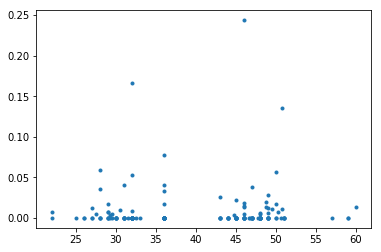

In [93]:
ageplot(age_table)

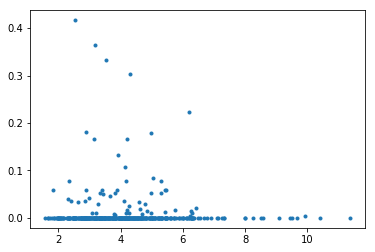

In [94]:
mluplot(mlu_table)

In [95]:
mlu_table.to_csv('one_time.csv', sep='\t')
age_table.to_csv('one_time.csv', mode='a', header=True)
